<a href="https://colab.research.google.com/github/abasnezhad/Kaggle/blob/main/Covid_in_Inda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots 
from datetime import datetime 

In [2]:
dfc=pd.read_csv('covid_19_india.csv')
dfv=pd.read_csv('covid_vaccine_statewise.csv')

In [3]:
dfc.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
dfc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sno,18110.0,9055.500000,5228.051023,1.0,4528.25,9055.5,13582.75,18110.0
Cured,18110.0,278637.518056,614890.894424,0.0,3360.25,33364.0,278869.75,6159676.0
Deaths,18110.0,4052.402264,10919.076411,0.0,32.00,588.0,3643.75,134201.0
Confirmed,18110.0,301031.401822,656148.872965,0.0,4376.75,39773.5,300149.75,6363442.0


In [6]:
dfv.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [7]:
dfc.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace= True, axis= 1)


In [8]:
dfc['Date']=pd.to_datetime(dfc['Date'], format='%Y-%m-%d')
dfc.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [9]:
# active cases 
dfc['Active_Cases']=dfc['Confirmed']-(dfc['Cured']+dfc['Deaths'])
dfc.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [10]:
statewise=pd.pivot_table(dfc, values=['Confirmed','Cured','Deaths'], index='State/UnionTerritory', aggfunc=max )


In [11]:
# recovery rate
statewise['recovery_rate']=statewise['Cured']*100/statewise['Confirmed']

In [12]:
# mortality rate
statewise['mortality_rate']=statewise['Deaths']*100/statewise['Confirmed']

In [13]:
statewise=statewise.sort_values(by='Confirmed', ascending=False)

In [14]:
#plot
statewise.style.background_gradient(cmap='cubehelix')



,Confirmed,Cured,Deaths,recovery_rate,mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [15]:
#top 10 active cases states
top_10_active = dfc.groupby(by='State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by='Active_Cases', ascending=False).reset_index()

<function matplotlib.pyplot.show>

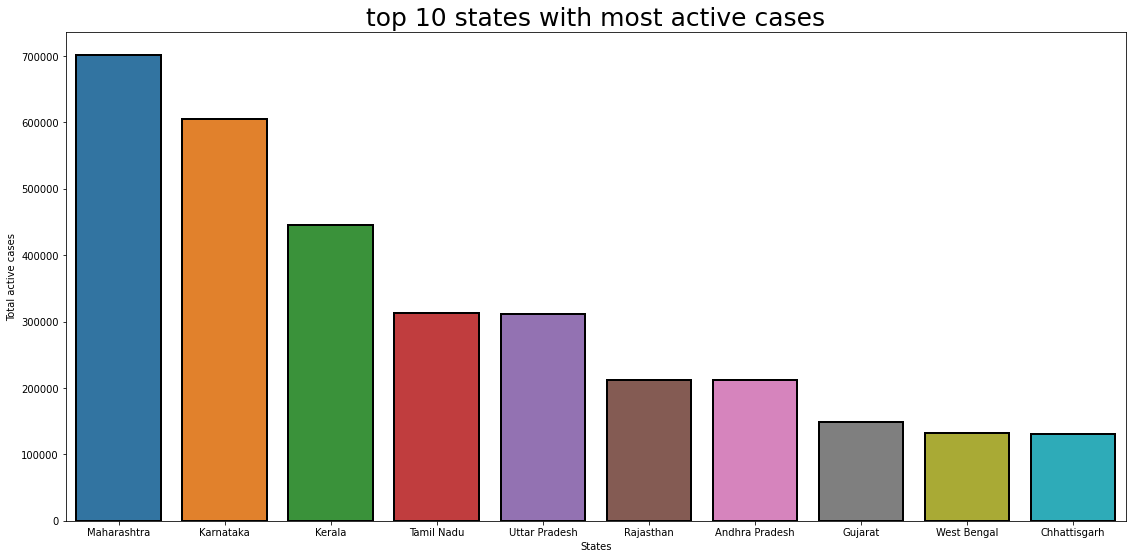

In [16]:
fig=plt.figure(figsize=(19,9))
plt.title('top 10 states with most active cases', size= 25)
ax= sns.barplot( data=top_10_active.iloc[:10], y= 'Active_Cases', x='State/UnionTerritory', linewidth=2, edgecolor= 'black')
plt.xlabel('States')
plt.ylabel('Total active cases')
plt.show

In [17]:
# 10 states with highest death
top_10_active=dfc.groupby(by='State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by='Deaths', ascending=False).reset_index()

<function matplotlib.pyplot.show>

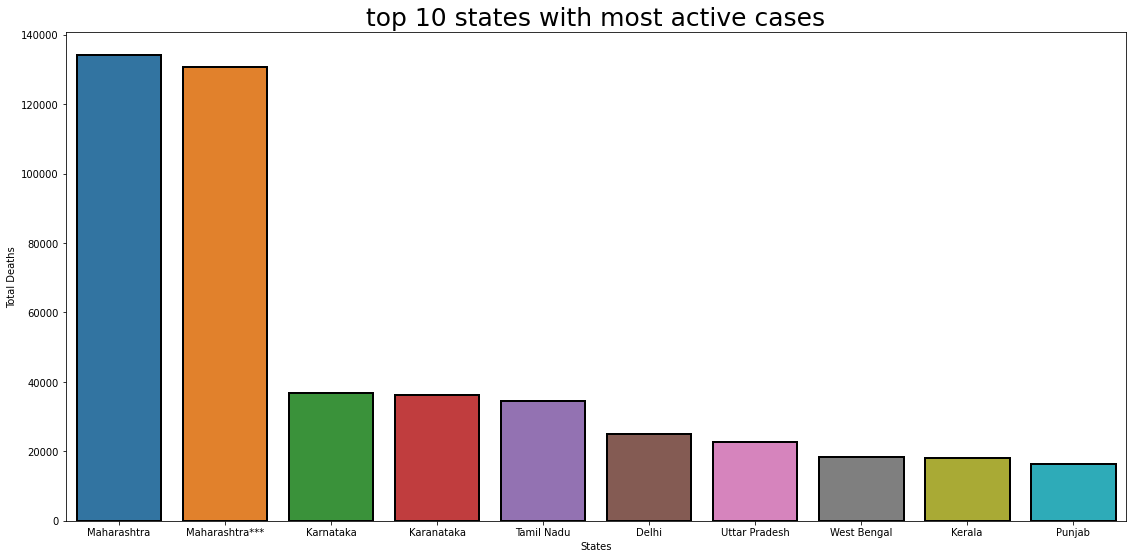

In [18]:
fig=plt.figure(figsize=(19,9))
plt.title('top 10 states with most active cases', size= 25)
ax= sns.barplot( data=top_10_active.iloc[:10], y= 'Deaths', x='State/UnionTerritory', linewidth=2, edgecolor= 'black')
plt.xlabel('States')
plt.ylabel('Total Deaths')
plt.show

Text(0.5, 1.0, 'top 5 afacted states')

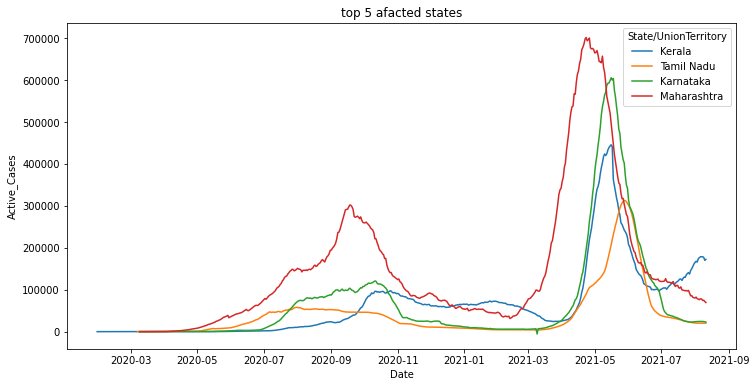

In [28]:
# growth trend
ig=plt.figure(figsize=(12,6))
ax= sns.lineplot(data= dfc[dfc['State/UnionTerritory'].isin(['Kerala', 'Maharashtra', 'Kerala', 'Tamil Nadu', 'Karnataka'])], 
                 x='Date', y='Active_Cases', hue='State/UnionTerritory')
ax.set_title('top 5 afacted states')

In [25]:
dfc['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [29]:
dfv.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [31]:
dfv.rename(columns={'Updated On': "Vaccine_Date"}, inplace=True)

In [34]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [38]:
dfv.isnull().sum().sort_values(ascending=False)

Transgender(Individuals Vaccinated)    7685
Female(Individuals Vaccinated)         7685
Male(Individuals Vaccinated)           7685
60+ Years (Doses Administered)         6143
45-60 Years (Doses Administered)       6143
18-44 Years (Doses Administered)       6143
Sputnik V (Doses Administered)         4850
18-44 Years(Individuals Vaccinated)    4112
60+ Years(Individuals Vaccinated)      4111
45-60 Years(Individuals Vaccinated)    4111
AEFI                                   2407
Total Individuals Vaccinated           1926
Transgender (Doses Administered)        384
Female (Doses Administered)             384
Male (Doses Administered)               384
CoviShield (Doses Administered)         224
 Covaxin (Doses Administered)           224
Second Dose Administered                224
First Dose Administered                 224
 Sites                                  224
Sessions                                224
Total Doses Administered                224
State                           

In [39]:
vaccination=dfv.drop(columns=['Sputnik V (Doses Administered)', '60+ Years(Individuals Vaccinated)', '45-60 Years(Individuals Vaccinated)', 'AEFI', '18-44 Years(Individuals Vaccinated)'], axis=1)

In [42]:
# male vs female vaccination 
male= vaccination['Male(Individuals Vaccinated)'].sum()
female= vaccination['Female(Individuals Vaccinated)'].sum()
px.pie(names= ['male', 'female'], values=[male, female], title='male vs female vaccination')

In [52]:

vaccine= dfv[dfv['State']!= 'India']
vaccine.rename(columns= {'Total Individuals Vaccinated':'Total'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<function matplotlib.pyplot.show>

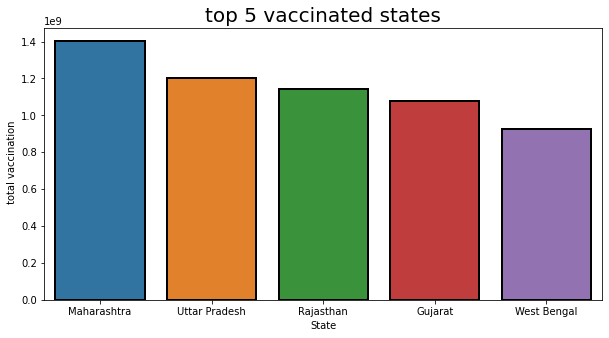

In [70]:
# states with most number of vaccinated 
max_vac=vaccine.groupby(['State'])['Total'].sum().to_frame('Total').sort_values(by='Total', ascending=False)[:5]
fig=plt.figure(figsize=(10,5))
plt.title('top 5 vaccinated states', size= 20)

ax=sns.barplot(data=max_vac.iloc[:10], y=max_vac.Total, x=max_vac.index, linewidth=2, edgecolor='black' )
plt.xlabel('State')
plt.ylabel(' total vaccination')
plt.show


<function matplotlib.pyplot.show>

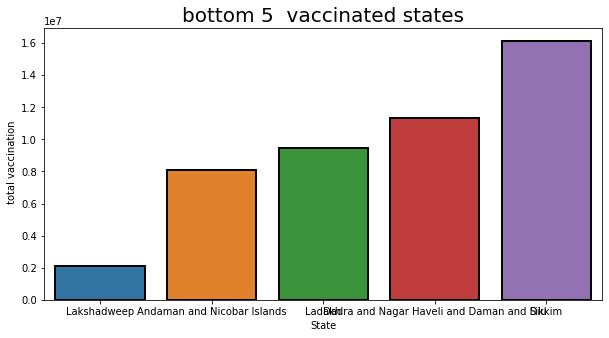

In [73]:
# states with least number of vaccinated 
min_vac=vaccine.groupby(['State'])['Total'].sum().to_frame('Total').sort_values(by='Total')[:5]

fig=plt.figure(figsize=(10,5))
plt.title('bottom 5  vaccinated states', size= 20)

ax=sns.barplot(data=min_vac.iloc[:10], y=min_vac.Total, x=min_vac.index, linewidth=2, edgecolor='black' )
plt.xlabel('State')
plt.ylabel(' total vaccination')
plt.show